In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# prodotto parametri impatto di figlie con lo stesso segno di carica (segno opposto, xy)
# rimuovere variabili correlate (overfitting)

custom_ranges = {
        'fChi2PCA': (0, 30), 
        'fDecayLength': (0, 10), 
        'fDecayLengthXY': (0, 10), 
        'fDecayLengthNormalised': (0, 5000),
        'fDecayLengthXYNormalised': (0, 5000), 
        'fPtProng0': (0, 15), 
        'fPtProng1': (0, 15), 
        'fPtProng2': (0, 15),
        'fImpactParameter0': (0, 1.5), 
        'fImpactParameter1': (0, 1.5), 
        'fImpactParameter2': (0, 1.5),
        'fImpactParameterZ0': (0, 5), 
        'fImpactParameterZ1': (0, 5), 
        'fImpactParameterZ2': (0, 5),
        'fNSigTpcPi0': (-10, 10), 
        'fNSigTpcKa0': (-10, 10), 
        'fNSigTofPi0': (-10, 10), 
        'fNSigTofKa0': (-10, 10),
        'fNSigTpcTofPi0': (0, 10), 
        'fNSigTpcTofKa0': (0, 10), 
        'fNSigTpcPi1': (-10, 10), 
        'fNSigTpcKa1': (-10, 10),
        'fNSigTofPi1': (-10, 10), 
        'fNSigTofKa1': (-10, 10), 
        'fNSigTpcTofPi1': (0, 10), 
        'fNSigTpcTofKa1': (0, 10),
        'fNSigTpcPi2': (-10, 10), 
        'fNSigTpcKa2': (-10, 10), 
        'fNSigTofPi2': (-10, 10), 
        'fNSigTofKa2': (-10, 10),
        'fNSigTpcTofPi2': (0, 10), 
        'fNSigTpcTofKa2': (0, 10), 
        'fCandidateSelFlag': (-5, 5), 
        'fM': (1.7, 2.1), 
        'fPt': (0, 24),
        'fCpa': (0.9, 1), 
        'fCpaXY': (0.9, 1), 
        'fMaxNormalisedDeltaIP': (0, 500), 
        'fEta': (-1.5, 1.5), 
        'fPhi': (0, 2*3.14), 
        'fY': (-1, 1),
        'fFlagMcMatchRec': (-5, 5), 
        'fOriginMcRec': (-5, 5), 
        'fFlagMcDecayChanRec': (-5, 5),
}

custom_bins = {
        'fCandidateSelFlag': 10, 
        'fFlagMcMatchRec': 10, 
        'fOriginMcRec': 10, 
        'fFlagMcDecayChanRec': 10,       
}

no_log_cols = {
        'fCandidateSelFlag': 10, 
        'fFlagMcMatchRec': 10, 
        'fOriginMcRec': 10, 
        'fFlagMcDecayChanRec': 10,       
}

In [ ]:
df_MC = pd.read_parquet("/data/shared/DplFlowML/MLtrees/MC/Train319993/HF_LHC24g2_Medium_2P3PDstar_2050.parquet")
df_prompt = pd.read_parquet("/data/shared/DplFlowML/MLtrees/MC/Train319993/HF_LHC24g2_Medium_2P3PDstar_2050_PromptDplus.parquet")
df_nonprompt = pd.read_parquet("/data/shared/DplFlowML/MLtrees/MC/Train319993/HF_LHC24g2_Medium_2P3PDstar_2050_NonPromptDplus.parquet")
df_data = pd.read_parquet("/data/shared/DplFlowML/MLtrees/Data/Train320051/HF_LHC23zzh_pass4_small_2P3PDstar_2050.parquet")

/home/mdicosta/virtenvpy/phys/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


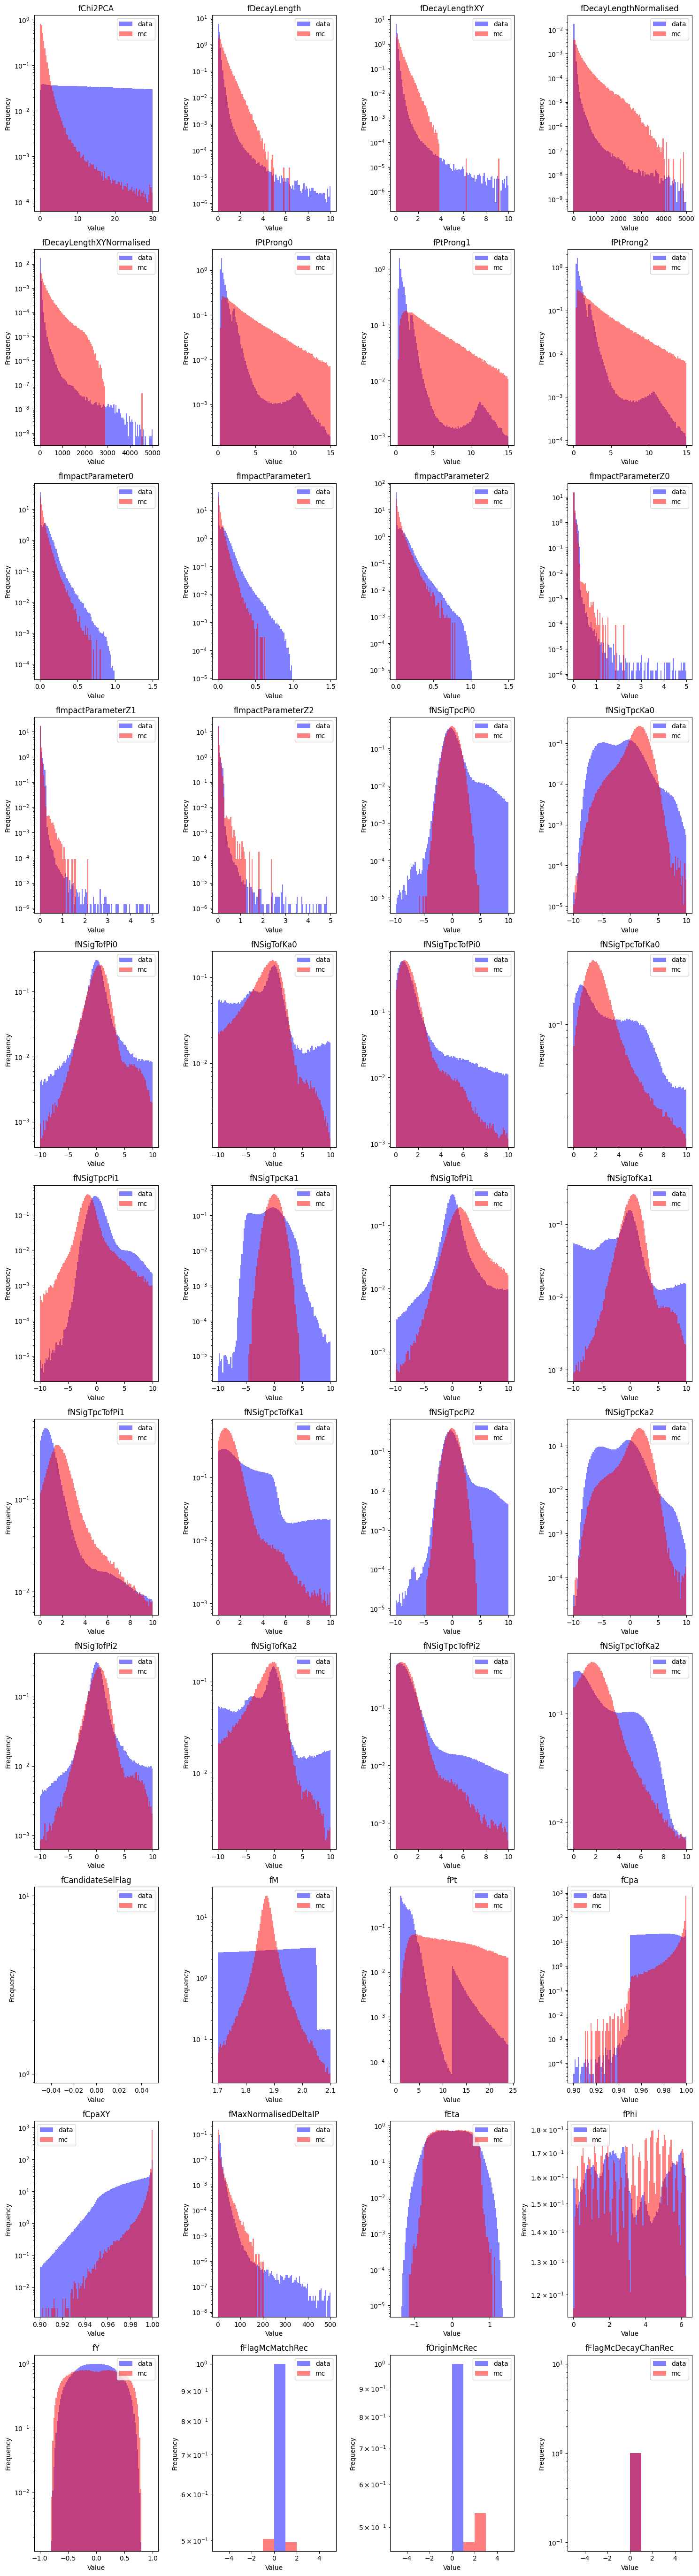

In [ ]:
n_columns = len(df_data.columns)
n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)

fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, column in enumerate(df_data.columns):
    axes[i].hist(df_data[column], bins=custom_bins.get(column, 100), range=custom_ranges.get(column, None), alpha=0.5, label="data", color='blue', density=True)
    axes[i].hist(df_MC[column], bins=custom_bins.get(column, 100), range=custom_ranges.get(column, None), alpha=0.5, label="mc", color='red', density=True)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].set_yscale('log')
    if column in no_log_cols:
        axes[i].set_yscale('linear')
    axes[i].legend()  # Add legend to the current axis

# Remove unused axes if any
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()